#Single layer NN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [5]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)

In [6]:
print(data.shape)
print(labels.shape)

(1000, 2)
(1000,)


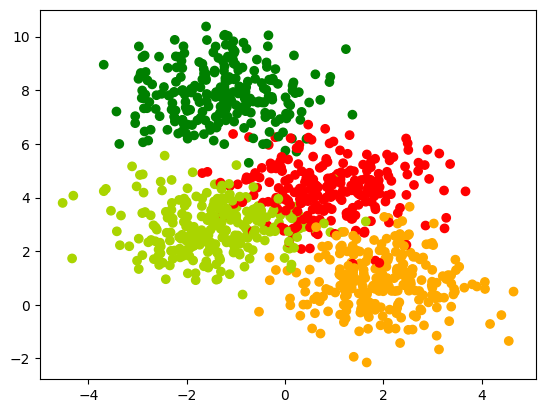

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

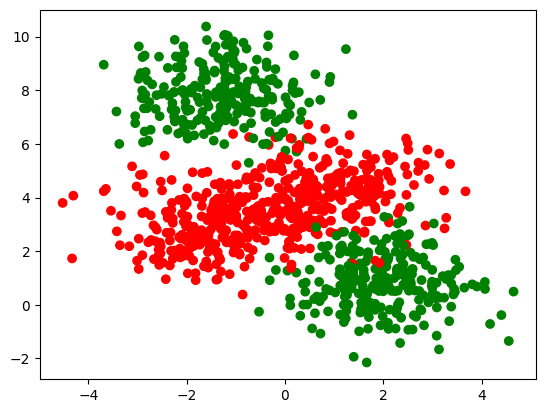

In [8]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
one_layer_model  =  keras.Sequential([
            layers.Dense(units=1, input_shape=[2], activation='sigmoid')
])

In [28]:
one_layer_model.compile(
    optimizer = "sgd",
    loss = "mse"
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)

(750, 2)
(250, 2)


In [29]:
history_of_one_layer = one_layer_model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2765
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2765
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2764
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2763
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2762
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2762
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2761
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2761
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2760
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 11/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2759
Epoch 12/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2759
Epoch 13/1000
24/24 [====

In [20]:
import pandas as pd

In [30]:
one_l_m_history_df = pd.DataFrame(history_of_one_layer.history)
one_l_m_history_df.tail(5)

,loss
995,0.265484
996,0.265478
997,0.265472
998,0.265471
999,0.265467


<Axes: >

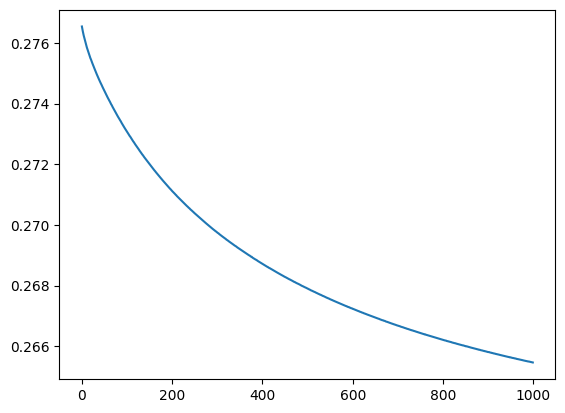

In [31]:
one_l_m_history_df['loss'].plot()

In [51]:
Y_pred_train = one_layer_model.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()


Y_pred_test = one_layer_model.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, y_test)



print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_test, 2))

8/8 [==============================] - 0s 6ms/step
Training accuracy 0.73
Validation accuracy 0.7


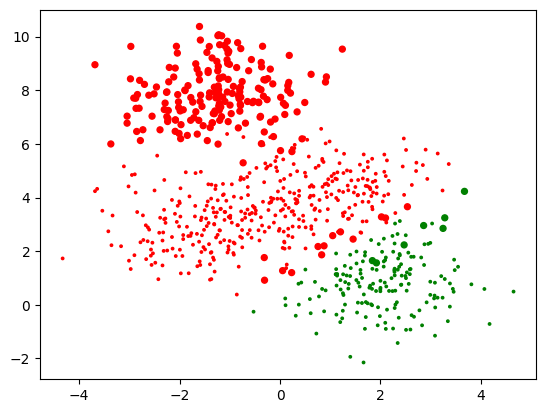

In [52]:
plt.scatter(X_train[:,0], X_train[:,1],
            c=Y_pred_binarised_train,
            cmap=my_cmap,
            s=15*(np.abs(Y_pred_binarised_train-y_train)+.2))
plt.show()

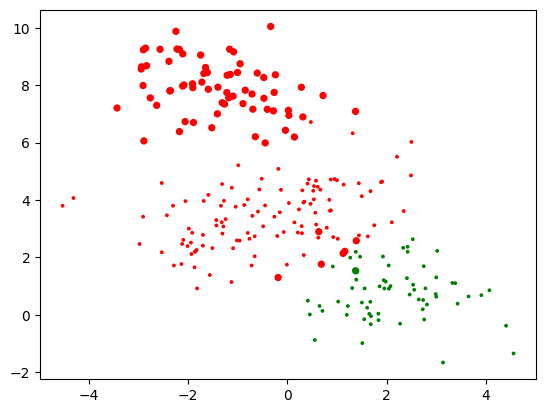

In [53]:
plt.scatter(X_test[:,0], X_test[:,1],
            c=Y_pred_binarised_test,
            cmap=my_cmap,
            s=15*(np.abs(Y_pred_binarised_test-y_test)+.2))
plt.show()

#Multi layer NN

In [54]:
mutli_layer_model = keras.Sequential([
        layers.Dense(units=2, activation='relu',
                     input_shape=[2]),
        layers.Dense(units=2, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')
])

In [55]:
mutli_layer_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
mutli_layer_model.compile(
    optimizer = "adam",
    loss= 'binary_crossentropy'
)

In [57]:
mutli_layer_model_history = mutli_layer_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.6902
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6883
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6836
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6808
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6777
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6738
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6696
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6645
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6587
Epoch 11/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6520
Epoch 12/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6450
Epoch 13/500
24/24 [=================

In [62]:
Y_pred_train = mutli_layer_model.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = mutli_layer_model.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_test)



print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

8/8 [==============================] - 0s 3ms/step
Training accuracy 0.96
Validation accuracy 0.98


In [60]:
mutli_layer_model_history_df = pd.DataFrame(mutli_layer_model_history.history)
mutli_layer_model_history_df.tail(5)

,loss
495,0.099975
496,0.100227
497,0.099634
498,0.099844
499,0.100304


<Axes: >

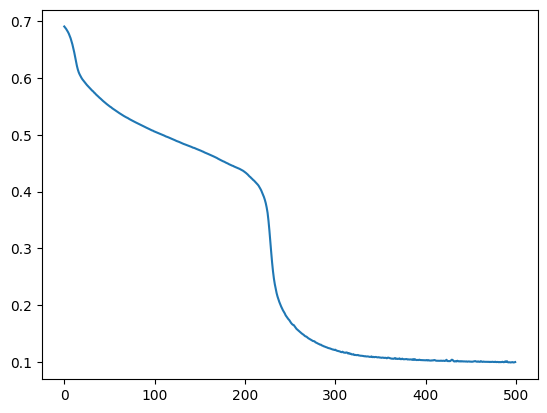

In [61]:
mutli_layer_model_history_df['loss'].plot()

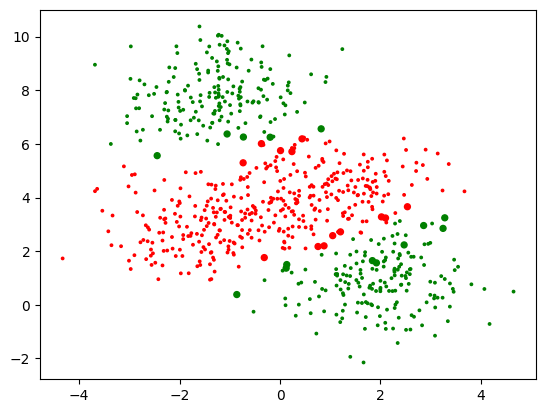

In [63]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-y_train)+.2))
plt.show()

#Exercise

(1000, 2) (1000,)


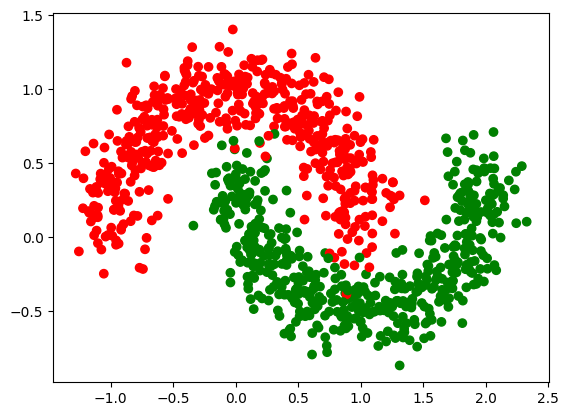

In [66]:
from sklearn.datasets import make_moons, make_circles
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.15)
print(data.shape, labels.shape)

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()